# Une elliptique salade de fruits confinée

## Antoine Chambert-Loir, 6 mai 2020

*Le confinement que nous vivons ce printemps a fait fleurir sur les réseaux sociaux recettes de cuisine et memes mathématiques.*

On en trouve de plus ou moins simples, comme celui-ci :

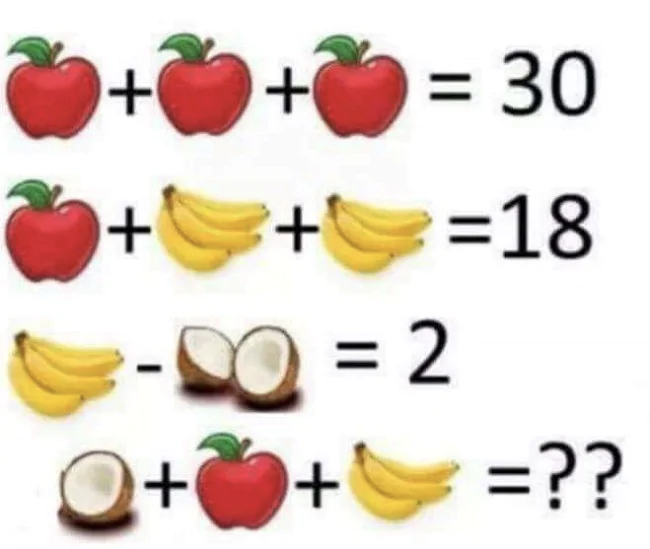

Vous observez cependant qu'il se ramène à un système linéaire échelonné.

*OMG! Il y a quelques ruses avec le nombre de noix de coco ou de bananes ; il n'empêche.*

Celui qui m'intéresse aujourd'hui est un peu plus sophistiqué :


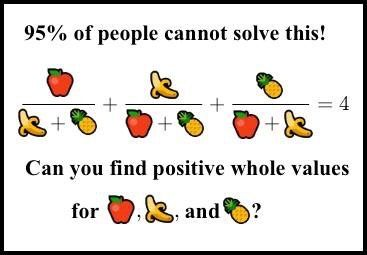

En formules, il s'agit de trouver des nombres entiers strictement positifs $x$, $y$, $z$ tels que $$ \frac{x}{y+z}+\frac{y}{x+z}+\frac{z}{x+y} = 4. $$

*Remplaçons l'entier 4 par un entier arbitraire $n$ (strictement positif, disons) et étudions l'équation un peu plus générale $$ \frac{x}{y+z}+\frac{y}{x+z}+\frac{z}{x+y} = n. $$*

On se débarrasse des fractions en la récrivant sous forme polynomiale:
$$ x(x+y)(x+z) + y(y+z)(y+x) + z (z+x)(z+y) $$
$$= 4 (x+y)(y+z)(z+x). $$

In [1]:
R.<x,y,z> = QQ[]
n=4
E = numerator(x/(y+z)+y/(x+z)+z/(x+y)-n)
E

x^3 - 3*x^2*y - 3*x*y^2 + y^3 - 3*x^2*z - 5*x*y*z - 3*y^2*z - 3*x*z^2 - 3*y*z^2 + z^3

Il s'agit d'une équation homogène en trois variables $x,y,z$, de degré $3$. Elle décrit une surface dans l'espace à 3 dimensions.

In [2]:
P=implicit_plot3d(E, (x,-3,3), (y,-3,3), (z,-3,3), plot_points=50, color='red')
P.show()

Graphics3d Object

Sa nature conique suggère de la considérer dans le plan projectif $\mathbf P_2$. 

Si on veut la tracer, on peut fixer une des coordonnées homogènes ; on obtient alors une cubique plane.

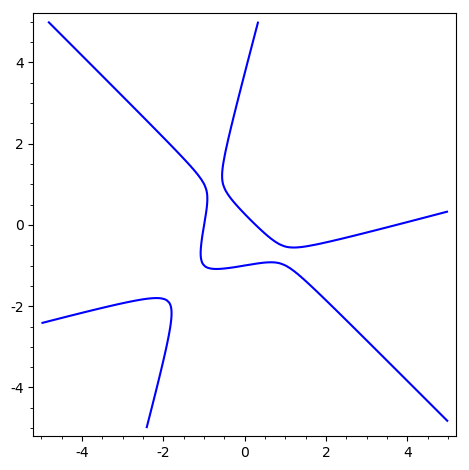

In [3]:
var ("u v")
P2=implicit_plot(E(u,v,1),(u,-5,5),(v,-5,5))
P2.show()

On a perdu les points à l'infini, correspondant à $z=0$. Ils correspondent dans le dessin à trois directions asymptotiques $y=-x$, $y=(2+\sqrt 3)x$ et $y=(2-\sqrt 3)x$.

In [4]:
factor(E(x,y,0))

(x + y) * (x^2 - 4*x*y + y^2)

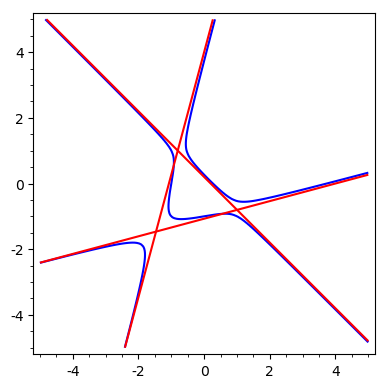

In [5]:
P2\
+implicit_plot(u+v-.2,(u,-5,5),(v,-5,5),color='red') \
+implicit_plot(u-(2+sqrt(3.0)) *v-4,(u,-5,5),(v,-5,5),color='red') \
+implicit_plot(v-(2+sqrt(3.0))*u-4,(u,-5,5),(v,-5,5),color='red')

## Cut-and-draw

Ce genre de courbe (ou d'équation diophantienne) est bien étudiée depuis le 18<sup>e</sup> siècle, et même avant : après tout, la première équation étudiée par Fermat, $x^3+y^3=z^3$ était de ce genre 
(c'est Euler qui a prouvé que celle-là n'avait pas de solution entière non triviale).

L'équation a $6$ solutions « évidentes » lorsqu'un des dénominateurs de l'équation initiale s'annule:
$$ \frac x{y+z}+ \frac{y}{x+z}+\frac z{x+y}=4,$$ 
qu'on voit bien si on la récrit sous forme polynomiale
$$ x(x+z)(y+z) + y(y+x)(y+z) + z(z+x)(z+y) $$ 
$$= 4 (x+y)(x+z)(y+z). $$


Par exemple si $x+y=0$, cela donne $x(x+z)(y+z)=0$. De fait :

In [6]:
E(x,-x,z)

-x^2*z + z^3

… et alors $z\in\{x,-x,0\}$.

Comme on a imposé $z=1$ (par homogénéité, $z\neq0$), l'une de ces solutions évidentes est « à l'infini » et il nous en reste $5$.

In [7]:
pts = [(1,-1),(-1,1),(-1,-1),(0,-1),(-1,0)]

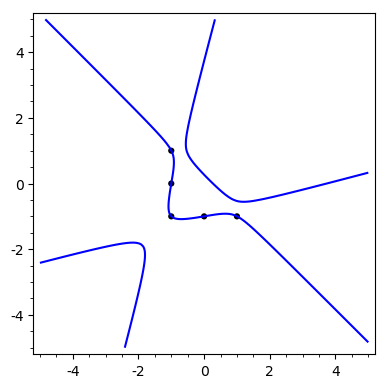

In [8]:
rnge=P2.get_axes_range()
P3=point(pts,color='black',size=20)
P2+P3

Ce qu'on sait aussi faire, pour étudier de telles équations, c'est faire de la géométrie avec leurs solutions. 

On considère deux points $A$ et $B$ sur la courbe et on trace la droite $(AB)$ qui les joint. Cette droite coupe la courbe cubique en trois points, on en connaît déjà deux, d'où un *troisième* point sur la courbe !

In [9]:
def extendedline(pA,pB,range):
    "Si la droite (pA-pB) rencontre la fenêtre indiquée, renvoie les deux points d'intersection"
    pC=[]
    if pA[0] != pB[0]:
        for rx in ['xmin','xmax']:
            t = (range[rx]-pA[0])/(pB[0]-pA[0])
            ry=(1-t)*pA[1]+t*pB[1]
            if ry >= range['ymin'] and ry<=range['ymax']:
                    pC.append(((1-t)*pA[0]+t*pB[0],(1-t)*pA[1]+t*pB[1]))
    if pA[1] != pB[1]:
        for ry in ['ymin','ymax']:
            t = (range[ry]-pA[1])/(pB[1]-pA[1])
            rx=(1-t)*pA[0]+t*pB[0]
            if rx >= range['xmin'] and rx<=range['xmax']:
                    pC.append(((1-t)*pA[0]+t*pB[0],(1-t)*pA[1]+t*pB[1]))
    return(pC)

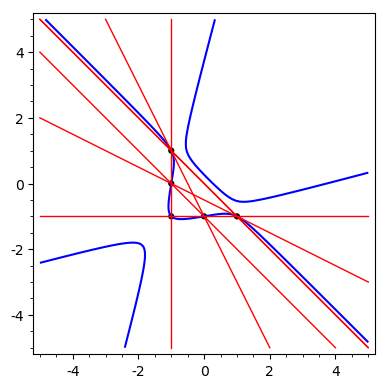

In [10]:
def all_lines(pts,rnge):
    l4=[]
    for n1 in range(len(pts)):
        for n2 in range(n1+1,len(pts)):
            l=extendedline(pts[n1],pts[n2],rnge)
            if l not in l4:
                l4.append(l)
    return(map(lambda l:line(l,color='red'), l4))
           
P4=sum(all_lines(pts,rnge))
P2+P3+P4

À ce stade, la géométrie semble avoir atteint ses limites…

## Deus ex machina

Mon petit doigt me dit que le point de coordonnées $(-1/4,11/4)$ est sur la courbe :

In [11]:
E(-1/4,11/4,1)

0

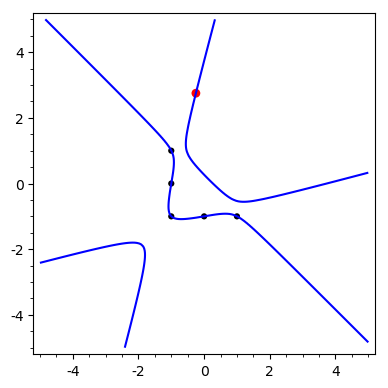

In [12]:
P2+point((-1/4,11/4),size=40,color='red')+P3


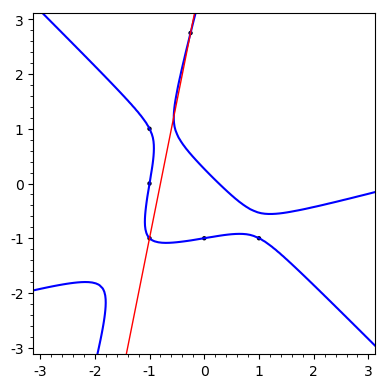

In [13]:
pts.append((-1/4,11/4))
l=extendedline(pts[5],pts[2],rnge)
(P2+line(l,color='red')+points(pts,color='black')).show(xmin=-3,xmax=3,ymin=-3,ymax=3)

In [14]:
def third_point(p,q,E):
    var('t')
    L=E((1-t)*p[0]+t*q[0],(1-t)*p[1]+t*q[1],1)
    for n in L.roots():
        if n[0]!=0 and n[0] != 1:
            return((1-n[0])*p[0]+n[0]*q[0],(1-n[0])*p[1]+n[0]*q[1])

In [15]:
r=third_point(pts[5],pts[2],E)
r

(-5/9, 11/9)

On peut ajouter ce point et recommencer la construction.

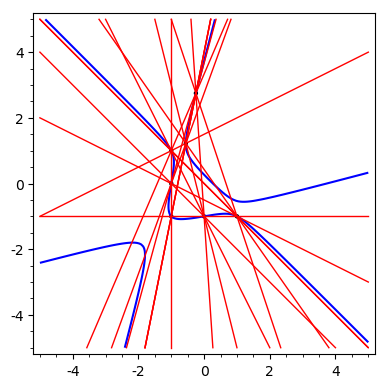

In [16]:
pts.append(third_point(pts[5],pts[2],E))

P2+points(pts,color='black') +sum(all_lines(pts,rnge))

In [17]:
def add_points(pts,E):
    newpts=pts.copy()
    for n1 in range(len(pts)):
        for n2 in range(n1+1,len(pts)):
            r=third_point(pts[n1],pts[n2],E)
            if r and r not in newpts:
                newpts.append(r)
    return(newpts)           

In [18]:
pts = [(1,-1),(-1,1),(-1,-1),(0,-1),(-1,0),(-1/4,11/4)]
add_points(pts,E)

[(1, -1),
 (-1, 1),
 (-1, -1),
 (0, -1),
 (-1, 0),
 (-1/4, 11/4),
 (9/11, -5/11),
 (-11/5, -9/5),
 (-5/9, 11/9),
 (-1/11, 4/11),
 (-4, -11)]

## Que la force soit avec nous…

Partons des points que nous connaissons, et essayons d'en produire *ad lib*…

In [19]:
pts

[(1, -1), (-1, 1), (-1, -1), (0, -1), (-1, 0), (-1/4, 11/4)]

In [20]:
def solve_pts(pts,E, check=False):
    goon=True
    m = 0
    while goon:
            M = len(pts)
            print(len(pts),' points…')
            for n1 in range(0,M):
                for n2 in range(max(m,n1+1),M):
                    r=third_point(pts[n1],pts[n2],E)
                    if r and r not in pts:
                        pts.append(r)
                        if check:
                            print(ln(numerator(r[0])*1.0),'chiffres…')
                        if r[0]>0 and r[1]>0:
                            return(r)
                            goon=False
            m=M

        

In [21]:
solve_pts(pts,E,check=False)

6  points…
11  points…
22  points…
41  points…
77  points…


(36875131794129999827197811565225474825492979968971970996283137471637224634055579/4373612677928697257861252602371390152816537558161613618621437993378423467772036,
 154476802108746166441951315019919837485664325669565431700026634898253202035277999/4373612677928697257861252602371390152816537558161613618621437993378423467772036)

In [22]:
r=pts[-1]

In [23]:
x1,y1,z1=numerator(r[0]),numerator(r[1]), denominator(r[0])
print('x =',x1,',\ny =',y1,',\nz =',z1)

x = 36875131794129999827197811565225474825492979968971970996283137471637224634055579 ,
y = 154476802108746166441951315019919837485664325669565431700026634898253202035277999 ,
z = 4373612677928697257861252602371390152816537558161613618621437993378423467772036


In [24]:
E(x1,y1,z1)

0

*Qu'est-ce c'est que ce cirque !?*

## Une loi de groupe

On peut donner un peu de consistance au procédé de construction de points par sécante et introduction du troisième point d'intersection.
En lui-même, ce procédé ne se comporte pas très bien. Parfois, la sécante ne coupe la courbe qu'en deux points. 
Mais cela s'explique par deux raisons :
- le point manquant est soit à l'infini, lorsque la sécante est parallèle à l'une des trois directions asymptotiques ;
- ou alors, c'est un des points dont en est parti, lorsque la sécante est tangente en ce point. 

Si on restaure les points à l'infini et tient compte des multiplicités, on dispose d'une loi bien définie, $(P,Q)\mapsto P\circ Q$.

Malgré tout, cette loi n'a pas de très bonnes propriétés, quoiqu'une simple modification en fasse une loi de groupe !

Fixons un point $O$ sur la courbe.

**Théorème. —** *Il existe une unique loi de groupe abélien, d'origine $O$, sur l'ensemble des points de la courbe pour laquelle $P+Q+(P\circ Q)=O$ dès que $P,Q$ sont deux points de la courbe.*

$Q=-P$ signifie que $O,P,Q$ sont alignés.

Cette loi de groupe est ainsi définie par la condition que $O, (P+Q), (P\circ Q)$ sont alignés.

L'associativité de cette loi est un théorème qu'on peut démontrer non trivialement à l'aide du théorème de Pascal, ou bien trivialement par le calcul formel.

**Remarque. —** Si $O,P,Q$ sont à coordonnées rationnelles, $P\circ Q$ et $P+Q$ le sont également, ainsi que $-P$. On obtient ainsi une loi de groupe sur les solutions rationnelles de l'équation initiale

**Théorème** (Mordell, 1922). — *Le groupe abélien des solutions rationnelles est un groupe abélien de type fini.*

Il a donc un sous-groupe de torsion, fini, et un *rang*.

In [25]:
f=EllipticCurve_from_cubic(E)
EC=f.codomain()

In [26]:
EC

Elliptic Curve defined by y^2 + x*y = x^3 + 69*x^2 + 1365*x + 8281 over Rational Field

In [27]:
EC.label()

'910c1'

In [28]:
f

Scheme morphism:
  From: Projective Plane Curve over Rational Field defined by x^3 - 3*x^2*y - 3*x*y^2 + y^3 - 3*x^2*z - 5*x*y*z - 3*y^2*z - 3*x*z^2 - 3*y*z^2 + z^3
  To:   Elliptic Curve defined by y^2 + x*y = x^3 + 69*x^2 + 1365*x + 8281 over Rational Field
  Defn: Defined on coordinates by sending (x : y : z) to
        (-x - z : x : 6/91*x - 1/91*y + 6/91*z)

In [29]:
f.inverse()

Scheme morphism:
  From: Elliptic Curve defined by y^2 + x*y = x^3 + 69*x^2 + 1365*x + 8281 over Rational Field
  To:   Projective Plane Curve over Rational Field defined by x^3 - 3*x^2*y - 3*x*y^2 + y^3 - 3*x^2*z - 5*x*y*z - 3*y^2*z - 3*x*z^2 - 3*y*z^2 + z^3
  Defn: Defined on coordinates by sending (x : y : z) to
        (y : -6*x - 91*z : -x - y)

L'origine choisie par SageMath est le point $(-1:0:1)$.

In [30]:
f.inverse()(EC(0))

(-1 : 0 : 1)

**Proposition. —** *Le sous-groupe de torsion du groupe de Mordell de cette courbe est formé des six solutions évidentes.*

In [31]:
list(map(f.inverse(),EC.torsion_points()))

[(1 : -1 : 1),
 (0 : -1 : 1),
 (-1 : 1 : 0),
 (-1 : -1 : 1),
 (-1 : 0 : 1),
 (-1 : 1 : 1)]

Il est donc isomorphe à $\mathbf Z/6\mathbf Z$.

**Proposition. —** *Le rang du groupe de Mordell de cette courbe est égal à $1$.*

In [32]:
EC.rank()

1

SageMath peut même en calculer un générateur (modulo la torsion):

In [33]:
f.inverse()(EC.gens()[0])

(-4 : -11 : 1)

Le problème est donc résolu : tous les points rationnels de la courbe sont produits par le procédé de sécante à partir de ce générateur et des six points évidents. Le point $(-1/4:11/4:1)$ qu'on avait mystérieusement ajouté était en fait l'un des 12 générateurs possibles…

In [35]:
gP=EC.gens()[0]
for x in EC.torsion_points():
    print(f.inverse()(gP+x), f.inverse()(-gP+x))

(9/11 : -5/11 : 1) (11/9 : -5/9 : 1)
(11/4 : -1/4 : 1) (-11 : -4 : 1)
(-1/11 : 4/11 : 1) (4/11 : -1/11 : 1)
(-11/5 : -9/5 : 1) (-9/5 : -11/5 : 1)
(-4 : -11 : 1) (-1/4 : 11/4 : 1)
(-5/9 : 11/9 : 1) (-5/11 : 9/11 : 1)


## Mais ne fallait-il pas des solutions positives ?!

Et c'est là que le problème devient *vraiment* difficile !

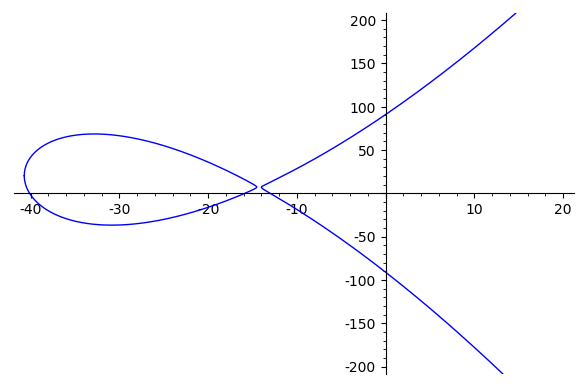

In [36]:
ECp=EC.plot(xmin=-50,xmax=20,ymin=-200,ymax=200)
ECp.show()

In [37]:
f.inverse()

Scheme morphism:
  From: Elliptic Curve defined by y^2 + x*y = x^3 + 69*x^2 + 1365*x + 8281 over Rational Field
  To:   Projective Plane Curve over Rational Field defined by x^3 - 3*x^2*y - 3*x*y^2 + y^3 - 3*x^2*z - 5*x*y*z - 3*y^2*z - 3*x*z^2 - 3*y*z^2 + z^3
  Defn: Defined on coordinates by sending (x : y : z) to
        (y : -6*x - 91*z : -x - y)

Autrement dit, les points de cette courbe qui nous intéressent correspondent aux deux domaines :

- $(y>0, x+y<0, 6x+91<0)$, soit $x<-91/6$ et $0<y<-x$;
- $(y<0, x+y>0, 6x+91>0)$, soit $x>-91/6$ et $-x<y<0$.


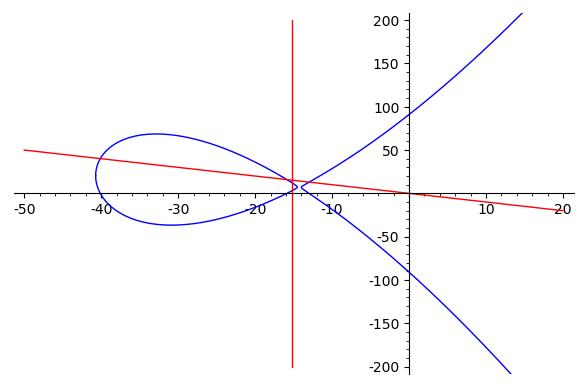

In [38]:
ECp+line([(-91/6,-200),(-91/6,200)],color='red')+line([(-50,50),(20,-20)],color='red')

On voit qu'il ne reste de cette courbe qu'une toute petite zone :

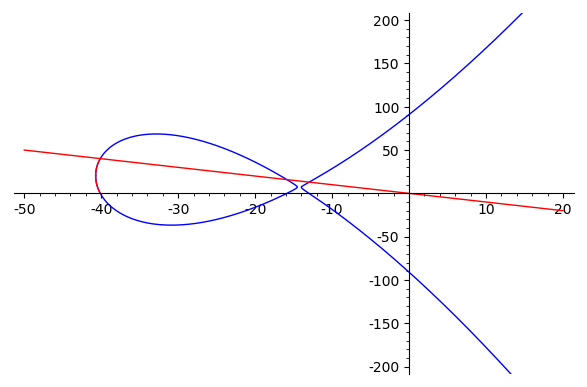

In [39]:
ECp2=EC.plot(xmin=-50,xmax=-40.12,ymin=0,ymax=20,color='red')
ECp3=ECp+ECp2+line([(-50,50),(20,-20)],color='red')
ECp3.show(xmin=-50,xmax=20,ymin=-200,ymax=200)

Il s'agit donc de trouver les multiples « du » générateur $P$ qui appartiennent à cette zone. Pour cela, on calcule $kP+T$, où $T$ parcourt les six points de torsion et $k=\pm1,\dots$. C'est seulement pour $k=9$ qu'on tombe dans la zone voulue.

In [40]:
def isOK(k):
    kgP=k*gP
    sols = []
    for tP in EC.torsion_points():
        Qf=f.inverse()(tP+kgP)
        Qf.clear_denominators()
        if ((Qf[0] > 0) and (Qf[1] > 0) and (Qf[2]>0)) or ((Qf[0] < 0) and (Qf[1] < 0) and (Qf[2]<0)):
            print ('finv (',tP,'+',k,gP,') \n    =',Qf)
            sols.append(Qf)
        Qf=f.inverse()(tP-kgP)
        Qf.clear_denominators()
        if ((Qf[0] > 0) and (Qf[1] > 0) and (Qf[2]>0)) or ((Qf[0] < 0) and (Qf[1] < 0) and (Qf[2]<0)):
            print ('finv (',tP,'-',k,gP,') \n    =',Qf)
            sols.append(Qf)
    return(sols)


In [41]:
sols=[]
k=0
while not(sols):
    k=k+1
    sols=isOK(k)

finv ( (-13 : 0 : 1) + 9 (-39 : 52 : 1) ) 
    = (4373612677928697257861252602371390152816537558161613618621437993378423467772036 : 36875131794129999827197811565225474825492979968971970996283137471637224634055579 : 154476802108746166441951315019919837485664325669565431700026634898253202035277999)
finv ( (-13 : 0 : 1) - 9 (-39 : 52 : 1) ) 
    = (4373612677928697257861252602371390152816537558161613618621437993378423467772036 : 154476802108746166441951315019919837485664325669565431700026634898253202035277999 : 36875131794129999827197811565225474825492979968971970996283137471637224634055579)
finv ( (-13 : 13 : 1) + 9 (-39 : 52 : 1) ) 
    = (36875131794129999827197811565225474825492979968971970996283137471637224634055579 : 154476802108746166441951315019919837485664325669565431700026634898253202035277999 : 4373612677928697257861252602371390152816537558161613618621437993378423467772036)
finv ( (-13 : 13 : 1) - 9 (-39 : 52 : 1) ) 
    = (154476802108746166441951315019919837485664325669565431

On peut chercher des solutions pour de plus grandes valeurs de $k$, peut-être seront-elles plus simples…

In [42]:
sols=[]
k=k+1
while not(sols):
    k=k+1
    sols=isOK(k)

finv ( (-14 : 7 : 1) + 13 (-39 : 52 : 1) ) 
    = (32343421153825592353880655285224263330451946573450847101645239147091638517651250940206853612606768544181415355352136077327300271806129063833025389772729796460799697289 : 184386514670723295219914666691038096275031765336404340516686430257803895506237580602582859039981257570380161221662398153794290821569045182385603418867509209632768359835 : 16666476865438449865846131095313531540647604679654766832109616387367203990642764342248100534807579493874453954854925352739900051220936419971671875594417036870073291371)
finv ( (-14 : 7 : 1) - 13 (-39 : 52 : 1) ) 
    = (16666476865438449865846131095313531540647604679654766832109616387367203990642764342248100534807579493874453954854925352739900051220936419971671875594417036870073291371 : 184386514670723295219914666691038096275031765336404340516686430257803895506237580602582859039981257570380161221662398153794290821569045182385603418867509209632768359835 : 32343421153825592353880655285224263330451946573

Pas vraiment !

**Théorème** (Néron, Tate). — *Le nombre de chiffres qu'il faut pour écrire un point de la forme $T\pm kP$ est de l'ordre de $k^2$.*

Plus précisément : *À un terme d'erreur borné près, le nombre de chiffres qu'il faut pour écrire un point du groupe de Mordell--Weil est une forme quadratique définie positive sur ce groupe (modulo torsion).*

## Merci !